# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [2]:
import os
import dill
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3


In [4]:
# 保存済みの population を読み込み
path_pop = "./result/20231231-1732/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [5]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

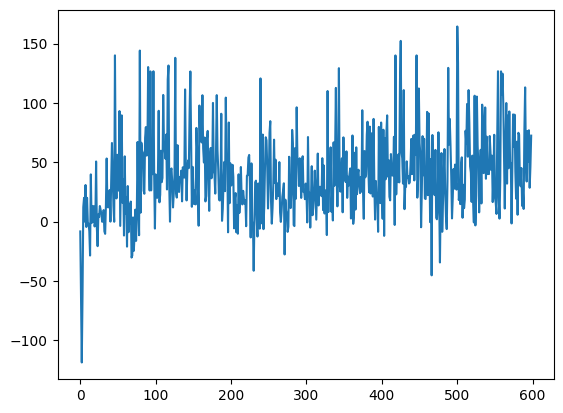

In [6]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [7]:
print(fitnesses[0][0:20])

[-8.27607170723404, -65.75767328604057, -118.65073289776637, -61.569629584716346, 12.168720498896624, 20.0, 0.0, 30.821574294410244, -4.518350251960382, 20.0, -0.5555922340787959, -1.8380140426729952, -8.033318967312285, -28.579343916019326, 39.761484192281266, -1.2639256185071763, 13.156674163162586, 0.0, 12.953728461661571, -4.081996975572268]


In [8]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[20.0, 0.0, 0.0, 0.0, -29.130000537299498, -7.172659003976019, -30.26379987860545, 0.0, -8.9240922827409, -19.48128394125974, 0.0, -28.33712534881384, 0.0, 0.0, -3.310062315681992, -41.51340907045006, 0.0, 40.0, -62.257087073882126, 60.0]


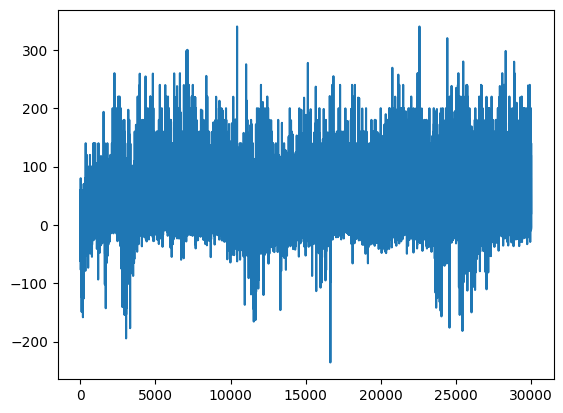

In [9]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

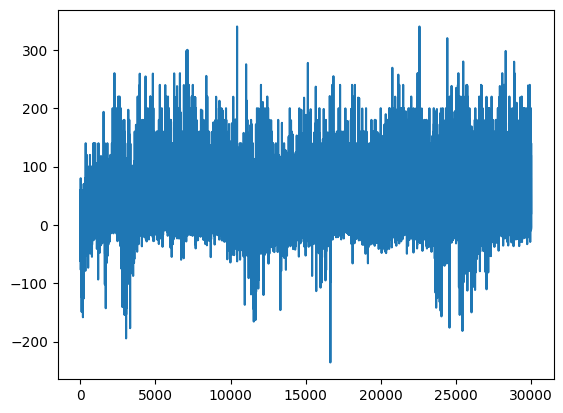

In [10]:
sns.lineplot(scores[0][0:-1], errorbar=('ci', 95))